In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from CommunicationJacobians.dysts_sim.flows import *
from CommunicationJacobians.jacobians.data_utils import compute_lyaps
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import torch

# Van der Pol Oscillator

In [3]:
eq_vals = dict(
    eq_name='VanDerPol',
    citation="van der Pol, B. (1926). LXXXVIII. On “relaxation-oscillations.” The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 2(11), 978–992.",
    embedding_dimension=2,
    parameters={'mu': 2},
    initial_conditions=[0.8, 1],
    positive_only=False,
    dt=0.1,
    sim_time=100,
)

No metadata available for VanDerPol
Overriding: metadata will be made!
Making metadata for VanDerPol!
Computing trajectory solutions...
Trajectory solutions identified!!
0.1
Finding period...


  0%|          | 0/50 [00:00<?, ?it/s]

Chosen period is 8.0 seconds
plotting stuff...


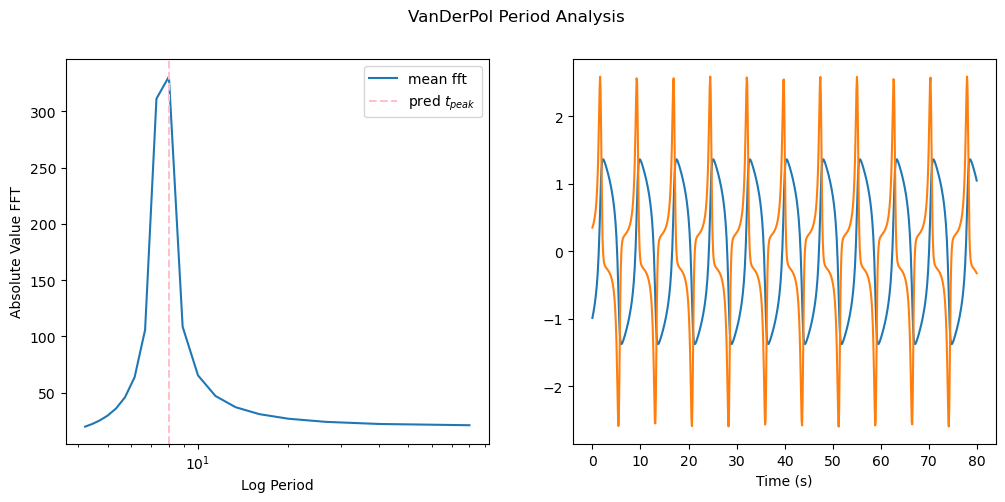

In [4]:
make_metadata(**eq_vals, override=True, testing=False)

## Test VanDerPol

In [5]:
eq = VanDerPol()

In [6]:
ret = eq.make_trajectory(n_periods=12, pts_per_period=100, num_ics=10, return_times=True, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

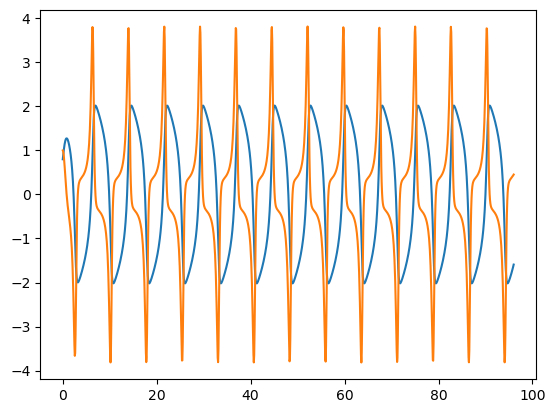

In [13]:
sol = ret['values']
plt.plot(ret['time'], sol[0, :, 0])
plt.plot(ret['time'], sol[0, :, 1])
plt.show()

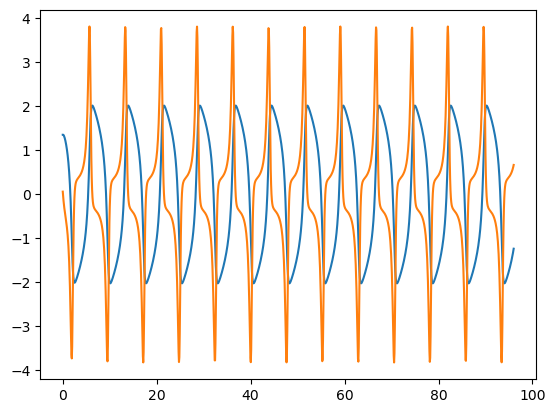

In [14]:
sol = ret['values']
plt.plot(ret['time'], sol[5, :, 0])
plt.plot(ret['time'], sol[5, :, 1])
plt.show()

# Lorenz96

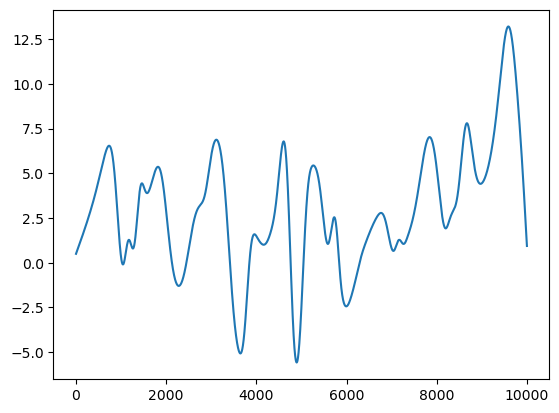

In [14]:
n = 128
F = 8
np.random.seed(42)
y0 = np.random.randn(n)

t_span = [0, 10]
dt = 0.001
t_eval = np.arange(t_span[0], t_span[1], dt)
sol = solve_ivp(lambda t, x: Lorenz96._rhs(x, t, F=F), y0=y0, t_span=t_span, t_eval=t_eval)
plt.plot(sol.y.T[:, 0])
plt.show()

In [19]:
jacs = np.zeros((sol.y.shape[1], n, n))
for t in tqdm(range(sol.y.shape[1])):
    jacs[t] = Lorenz96._jac(sol.y[:, t], t, F=F)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [30]:

k = 48

lyaps= compute_lyaps(torch.from_numpy(np.eye(n) + dt*jacs), dt=dt, k=k)
        # lyap_vals[num_traj] = compute_lyapunov_exponents(np.eye(3) + dt*jacobian_mats[num_traj], dt=dt)

In [32]:
eq_vals = dict(
    eq_name='Lorenz96',
    citation="Lorenz, E. N. (1996). Predictability: A problem partly solved. In Proceedings of the seminar on predictability, Vol. I (pp. 1-18).",
    # citation="Alfred James Lotka. Elements of physical biology. Williams & Wilkins, 1925." + " | " + "Karniol-Tambour, O., Zoltowski, D. M., Diamanti, E. M., Pinto, L., Tank, D. W., Brody, C. D., & Pillow, J. W. (2022). Modeling communication and switching nonlinear dynamics in multi-region neural activity. In bioRxiv (p. 2022.09.13.507841). https://doi.org/10.1101/2022.09.13.507841",
    embedding_dimension=n,
    parameters={'F': F},
    initial_conditions=y0.tolist(),
    positive_only=False,
    vectorize=True,
    dt=0.001,
    sim_time=10,
)

Overriding: metadata will be made!
Making metadata for Lorenz96!
Computing trajectory solutions...
Trajectory solutions identified!!
0.001
Finding period...


  0%|          | 0/3200 [00:00<?, ?it/s]

Chosen period is 1.8125177003681676 seconds
plotting stuff...


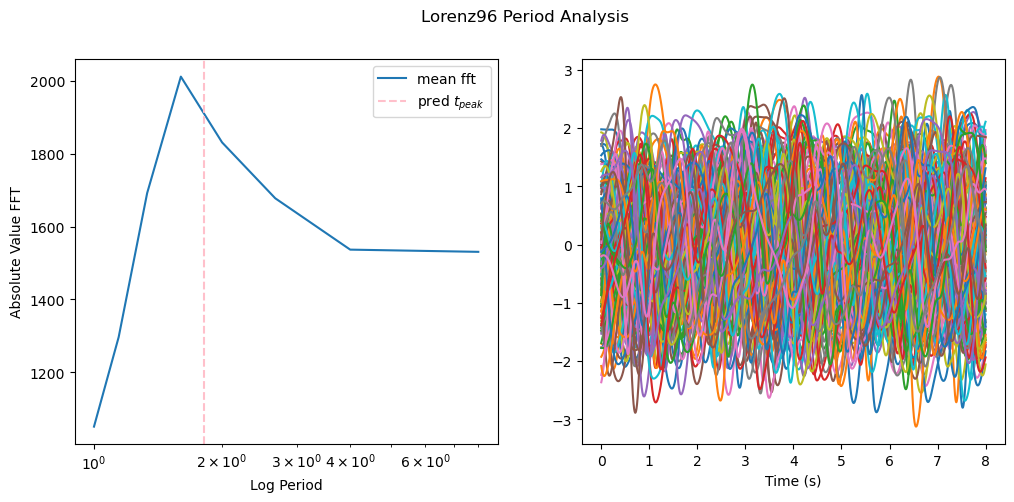

In [33]:
make_metadata(**eq_vals, override=True, testing=False)

### Testing

In [5]:
eq = Lorenz96()

In [6]:
n_periods = 12
pts_per_period = 100
ret = eq.make_trajectory(n_periods=n_periods, pts_per_period=pts_per_period, num_ics=10, return_times=True, verbose=True)

  0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
jacs = eq.jac(ret['values'], ret['time'])

In [14]:
dt = eq.period/pts_per_period

In [20]:
lyaps = compute_lyaps(torch.matrix_exp(torch.from_numpy(jacs)*dt), dt=dt, k=5)

In [23]:
eq._load_data()

{'bifurcation_parameter': None,
 'citation': 'Lorenz, E. N. (1996). Predictability: A problem partly solved. In Proceedings of the seminar on predictability, Vol. I (pp. 1-18).',
 'correlation_dimension': None,
 'delay': False,
 'description': None,
 'dt': 0.000725007080147267,
 'embedding_dimension': 128,
 'hamiltonian': False,
 'initial_conditions': [0.4967141530112327,
  -0.13826430117118466,
  0.6476885381006925,
  1.5230298564080254,
  -0.23415337472333597,
  -0.23413695694918055,
  1.5792128155073915,
  0.7674347291529088,
  -0.4694743859349521,
  0.5425600435859647,
  -0.46341769281246226,
  -0.46572975357025687,
  0.24196227156603412,
  -1.913280244657798,
  -1.7249178325130328,
  -0.5622875292409727,
  -1.0128311203344238,
  0.3142473325952739,
  -0.9080240755212109,
  -1.4123037013352915,
  1.465648768921554,
  -0.22577630048653566,
  0.06752820468792384,
  -1.4247481862134568,
  -0.5443827245251827,
  0.11092258970986608,
  -1.1509935774223028,
  0.37569801834567196,
  -0.60

In [22]:
lyaps

tensor([[1.3284, 1.3686, 1.1474, 1.1315, 1.1132],
        [1.3537, 1.2557, 1.3101, 1.1826, 1.1663],
        [1.3075, 1.3950, 1.4664, 1.2586, 1.2093],
        [1.5053, 1.2918, 1.1200, 1.1454, 1.1014],
        [1.5816, 1.4526, 1.4605, 1.3539, 1.2075],
        [1.2439, 1.3483, 1.1878, 1.1267, 1.0599],
        [1.3808, 1.4032, 1.2933, 1.3335, 1.2088],
        [1.3706, 1.2474, 1.1282, 1.1332, 1.0717],
        [1.5853, 1.6327, 1.3918, 1.3448, 1.2623],
        [1.4438, 1.3445, 1.4262, 1.1498, 1.1461]], dtype=torch.float64)

# Lorenz96 Flexible

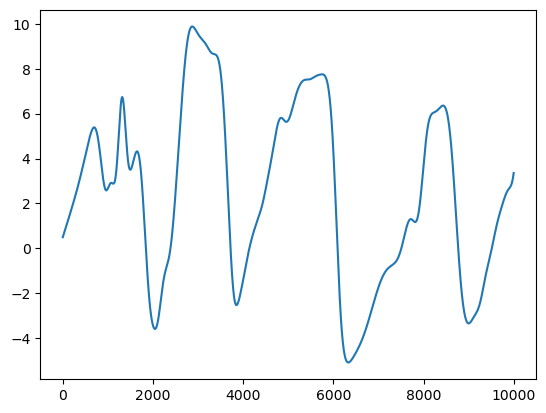

In [3]:
n = 64
F = 8
np.random.seed(42)
y0 = np.random.randn(n)

t_span = [0, 10]
dt = 0.001
t_eval = np.arange(t_span[0], t_span[1], dt)
sol = solve_ivp(lambda t, x: Lorenz96._rhs(x, t, F=F), y0=y0, t_span=t_span, t_eval=t_eval)
plt.plot(sol.y.T[:, 0])
plt.show()

In [4]:
eq_vals = dict(
    eq_name=f'Lorenz96n{n}',
    citation="Lorenz, E. N. (1996). Predictability: A problem partly solved. In Proceedings of the seminar on predictability, Vol. I (pp. 1-18).",
    # citation="Alfred James Lotka. Elements of physical biology. Williams & Wilkins, 1925." + " | " + "Karniol-Tambour, O., Zoltowski, D. M., Diamanti, E. M., Pinto, L., Tank, D. W., Brody, C. D., & Pillow, J. W. (2022). Modeling communication and switching nonlinear dynamics in multi-region neural activity. In bioRxiv (p. 2022.09.13.507841). https://doi.org/10.1101/2022.09.13.507841",
    embedding_dimension=n,
    parameters={'F': F},
    initial_conditions=y0.tolist(),
    positive_only=False,
    vectorize=True,
    dt=0.001,
    sim_time=10,
)

No metadata available for Lorenz96n64
Overriding: metadata will be made!
Making metadata for Lorenz96n64!
Computing trajectory solutions...
Trajectory solutions identified!!
0.001
Finding period...


  0%|          | 0/1600 [00:00<?, ?it/s]

Chosen period is 1.8045960806428871 seconds
plotting stuff...


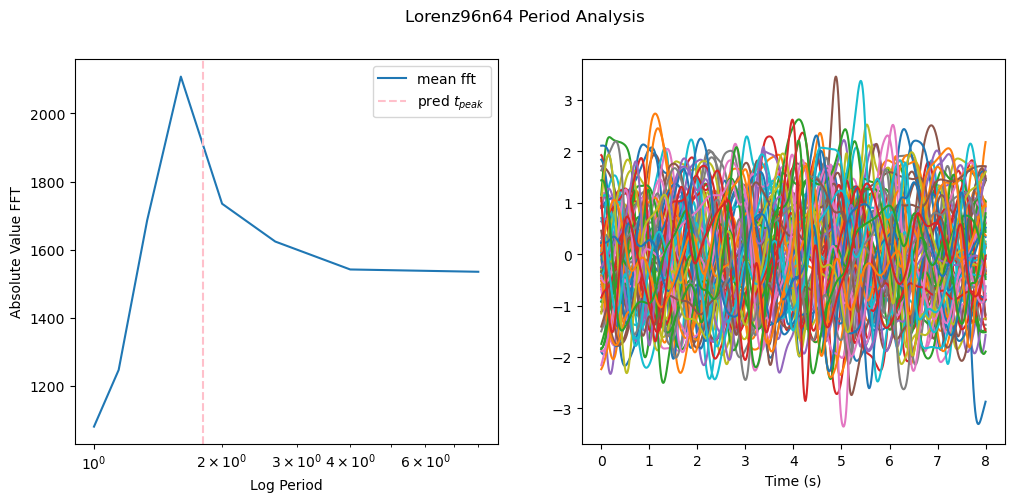

In [7]:
make_metadata(**eq_vals, override=True, testing=False)